In [1]:
!pip install yfinance
!pip install mplfinance

In [12]:
from pandas_datareader import data as pdr
import pandas as pd
import yfinance as yf
import mplfinance as mf
import matplotlib as plt
yf.pdr_override()

In [9]:
start = '2017-01-01'
end = '2020-07-01'

In [32]:
data = pdr.get_data_yahoo("PTT.BK", start=start, end=end)

[*********************100%***********************]  1 of 1 completed


In [33]:
data['Mean'] = data['Adj Close'].rolling(window=180).mean()
data['std'] = data['Adj Close'].rolling(window=180).std()

In [34]:
data

,Open,High,Low,Close,Adj Close,Volume,Mean,std
Date,,,,,,,,
2017-01-04,37.400002,38.099998,37.299999,38.000000,30.816397,75879000,NaN,NaN
2017-01-05,38.200001,38.799999,38.200001,38.700001,31.384062,75282000,NaN,NaN
2017-01-06,38.700001,38.900002,38.500000,38.900002,31.546255,45129000,NaN,NaN
2017-01-09,38.900002,39.000000,38.200001,38.299999,31.059690,40455000,NaN,NaN
2017-01-10,38.299999,38.900002,38.200001,38.799999,31.465160,43224000,NaN,NaN
...,...,...,...,...,...,...,...,...
2020-06-24,39.000000,39.000000,37.250000,37.500000,35.468060,45653000,37.283758,4.751173
2020-06-25,37.000000,37.250000,36.250000,37.250000,35.231606,50161000,37.250186,4.744160
2020-06-26,37.750000,38.000000,37.000000,37.000000,34.995148,32050100,37.215299,4.737484


In [35]:
data['Upper Band'] = data['Mean'] + 2*data['std']
data['Lower Band'] = data['Mean'] - 2*data['std']

In [36]:
data

,Open,High,Low,Close,Adj Close,Volume,Mean,std,Upper Band,Lower Band
Date,,,,,,,,,,
2017-01-04,37.400002,38.099998,37.299999,38.000000,30.816397,75879000,NaN,NaN,NaN,NaN
2017-01-05,38.200001,38.799999,38.200001,38.700001,31.384062,75282000,NaN,NaN,NaN,NaN
2017-01-06,38.700001,38.900002,38.500000,38.900002,31.546255,45129000,NaN,NaN,NaN,NaN
2017-01-09,38.900002,39.000000,38.200001,38.299999,31.059690,40455000,NaN,NaN,NaN,NaN
2017-01-10,38.299999,38.900002,38.200001,38.799999,31.465160,43224000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2020-06-24,39.000000,39.000000,37.250000,37.500000,35.468060,45653000,37.283758,4.751173,46.786104,27.781413
2020-06-25,37.000000,37.250000,36.250000,37.250000,35.231606,50161000,37.250186,4.744160,46.738505,27.761866
2020-06-26,37.750000,38.000000,37.000000,37.000000,34.995148,32050100,37.215299,4.737484,46.690267,27.740332


In [37]:
df = data.loc[:,['Adj Close','Mean','std','Upper Band','Lower Band']]

<AxesSubplot:xlabel='Date'>

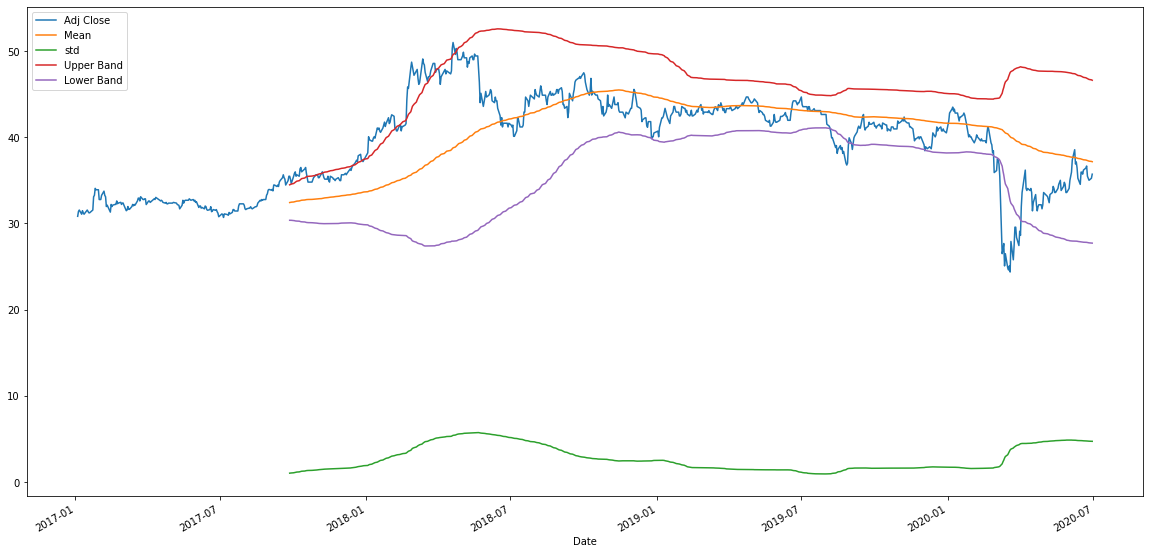

In [38]:
df.plot(figsize=(20,10))